<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/Exercicios_Master_Semana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

S1D4 - Atividade Hands on (Variáveis e Correlação)
Nome: Karina Herrera Silva

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
# importando biblioteca e arquivos
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

ideb = pd.read_csv('/content/drive/MyDrive/ideb.csv')
pib = pd.read_csv('/content/drive/MyDrive/pib.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# selecionando colunas
ideb_colunas_select = ideb[['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb_colunas_select

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,1200302,167.80,165.60,2.3
1,2005,1200328,151.80,149.60,1.8
2,2005,1200328,163.60,155.80,1.9
3,2005,1200328,159.00,153.39,1.9
4,2005,1200336,138.00,134.19,2.3
...,...,...,...,...,...
294421,2019,3551108,229.75,216.07,6.2
294422,2019,3551702,305.85,296.39,6.2
294423,2019,3555406,230.69,216.92,6.2
294424,2019,3555406,230.69,216.92,6.2


In [ ]:
# criando tabela com colunas selecionadas e filtrando pelo ano de 2019
ideb_tab = ideb_colunas_select.loc[ideb_colunas_select['ano'] == 2019]
ideb_tab

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
8947,2019,1200104,288.92,263.10,8.1
8948,2019,1200104,254.78,231.63,6.8
8949,2019,1200401,246.47,228.63,6.7
8950,2019,1200450,256.67,231.75,6.9
8951,2019,2701407,261.32,223.47,7.0
...,...,...,...,...,...
294421,2019,3551108,229.75,216.07,6.2
294422,2019,3551702,305.85,296.39,6.2
294423,2019,3555406,230.69,216.92,6.2
294424,2019,3555406,230.69,216.92,6.2


In [ ]:
# agrupando por id_municipio
ideb_final = ideb_tab.groupby('id_municipio').mean()
ideb_final

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,
1100015,2019.0,253.283750,242.246250,5.050000
1100023,2019.0,248.223750,243.618750,4.762500
1100031,2019.0,229.495000,221.500000,4.850000
1100049,2019.0,259.150000,249.888889,5.200000
1100056,2019.0,266.288571,254.334286,5.642857
...,...,...,...,...
5222005,2019.0,272.708571,262.805714,6.000000
5222054,2019.0,271.685714,264.780000,5.828571
5222203,2019.0,241.580000,231.394286,4.657143


**Anotações:**

*Tudo junto*: ideb_final = ideb[['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']].loc[ideb['ano'] == 2019].groupby('id_municipio').mean()

*mostra só a coluna ano e só linhas de 2019* --> ideb_data = ideb[['ano']].query('ano == 2019')

*mostra todas as colunas e só linhas de 2019* --> ideb_data = ideb.query('ano == 2019') 

*outro método de selecionar colunas e filtrar por ano* --> ideb_data = ideb[['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']].query('ano == 2019')

### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
# selecionando colunas
pib_colunas_select = pib[['ano', 'id_municipio', 'pib', 'impostos_liquidos']]
ideb_colunas_select

,ano,id_municipio,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,1200302,167.80,165.60,2.3
1,2005,1200328,151.80,149.60,1.8
2,2005,1200328,163.60,155.80,1.9
3,2005,1200328,159.00,153.39,1.9
4,2005,1200336,138.00,134.19,2.3
...,...,...,...,...,...
294421,2019,3551108,229.75,216.07,6.2
294422,2019,3551702,305.85,296.39,6.2
294423,2019,3555406,230.69,216.92,6.2
294424,2019,3555406,230.69,216.92,6.2


In [ ]:
# criando tabela com colunas selecionadas e filtrando pelo ano de 2019
pib_tab = pib_colunas_select.loc[pib_colunas_select['ano'] == 2019]
pib_tab

,ano,id_municipio,pib,impostos_liquidos
94616,2019,1100015,495628767,29350985
94617,2019,1100023,2578829725,284397627
94618,2019,1100031,139959390,5997974
94619,2019,1100049,2260643565,253988284
94620,2019,1100056,506854457,76671376
...,...,...,...,...
100181,2019,5222005,483663323,37741787
100182,2019,5222054,342355634,33561723
100183,2019,5222203,113668466,8405675
100184,2019,5222302,206971225,7933047


In [ ]:
# agrupando por id_municipio
pib_final = pib_tab.groupby('id_municipio').mean()
pib_final

,ano,pib,impostos_liquidos
id_municipio,,,
1100015,2019.0,4.956288e+08,2.935098e+07
1100023,2019.0,2.578830e+09,2.843976e+08
1100031,2019.0,1.399594e+08,5.997974e+06
1100049,2019.0,2.260644e+09,2.539883e+08
1100056,2019.0,5.068545e+08,7.667138e+07
...,...,...,...
5222005,2019.0,4.836633e+08,3.774179e+07
5222054,2019.0,3.423556e+08,3.356172e+07
5222203,2019.0,1.136685e+08,8.405675e+06


**Anotações:**

*Tudo junto*: pib_final = pib[['ano', 'id_municipio', 'pib', 'impostos_liquidos']].loc[pib['ano'] == 2019].groupby('id_municipio').mean()

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
dados = pd.concat([ideb_final, pib_final], axis=1, join='outer')
dados

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano,pib,impostos_liquidos
id_municipio,,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,2.935098e+07
1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,2.843976e+08
1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5.997974e+06
1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,2.539883e+08
1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,7.667138e+07
...,...,...,...,...,...,...,...
5222005,2019.0,272.708571,262.805714,6.000000,2019.0,4.836633e+08,3.774179e+07
5222054,2019.0,271.685714,264.780000,5.828571,2019.0,3.423556e+08,3.356172e+07
5222203,2019.0,241.580000,231.394286,4.657143,2019.0,1.136685e+08,8.405675e+06


**Anotações**:

*outro método de juntar* --> pd.merge(left=ideb_final, right=pib_final, left_on='id_municipio', right_on='id_municipio', how = 'outer')

### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
# seu código
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 1100015 to 5300108
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          5570 non-null   float64
 1   nota_saeb_matematica         5549 non-null   float64
 2   nota_saeb_lingua_portuguesa  5549 non-null   float64
 3   ideb                         5549 non-null   float64
 4   ano                          5570 non-null   float64
 5   pib                          5570 non-null   float64
 6   impostos_liquidos            5570 non-null   float64
dtypes: float64(7)
memory usage: 477.2 KB


Há 21 dados faltantes e há 2 colunas irrelevantes (ano e ano), já que os dados são todos de 2019.

In [ ]:
dados.drop(['ano'], inplace=True, axis=1)
dados

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,
1100015,253.283750,242.246250,5.050000,4.956288e+08,2.935098e+07
1100023,248.223750,243.618750,4.762500,2.578830e+09,2.843976e+08
1100031,229.495000,221.500000,4.850000,1.399594e+08,5.997974e+06
1100049,259.150000,249.888889,5.200000,2.260644e+09,2.539883e+08
1100056,266.288571,254.334286,5.642857,5.068545e+08,7.667138e+07
...,...,...,...,...,...
5222005,272.708571,262.805714,6.000000,4.836633e+08,3.774179e+07
5222054,271.685714,264.780000,5.828571,3.423556e+08,3.356172e+07
5222203,241.580000,231.394286,4.657143,1.136685e+08,8.405675e+06


**Anotações**:

*outro método de ver dados faltantes* --> dados.isnull().any()

*mais um método de ver dados faltantes* --> final_df.isna().sum()

### Atividade 5: Quais são os tipos das variáveis do DataFrame?

id_municipio: **categórica nominal**

notas, ideb, pib, impostos_liquidos: **quantitativa contínua**

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [ ]:
# seu código
dados[['ideb', 'pib']].corr(method='pearson')

,ideb,pib
ideb,1.000000,0.037105
pib,0.037105,1.000000


A correlação entre o ideb e o pib é próxima de 0, portanto não há correlação entre as duas variáveis.

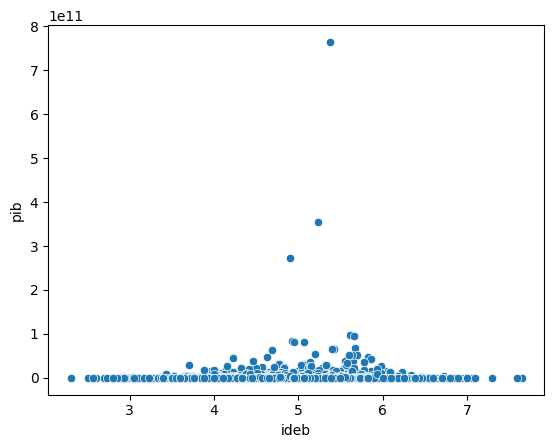

In [ ]:
sns.scatterplot(data=dados, x='ideb', y='pib');

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

**sua resposta**

Não é possível fazer correlação entre uma variável nominal e uma variável numérica, portanto não existe correlação entre id_municipio e ideb.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [ ]:
# seu código

seg_rj = pd.read_csv('/content/drive/MyDrive/seg_rj.csv')
seg_rj

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2021,2,2021m02,1.41,0.02,0.07,1.50,0.85,2.35,1.91,...,4.71,0.20,23.65,1.68,0.14,0.03,3.75,0.00,281.30,3.0
218,2021,3,2021m03,1.80,0.04,0.05,1.89,0.91,2.79,2.36,...,6.13,0.20,26.01,1.88,0.13,0.01,3.75,0.00,311.49,3.0
219,2021,4,2021m04,1.73,0.02,0.04,1.79,0.81,2.60,1.93,...,5.04,0.15,22.30,1.59,0.11,0.03,5.63,0.00,274.01,2.0
220,2021,5,2021m05,1.52,0.01,0.03,1.57,0.64,2.21,1.95,...,5.56,0.25,23.08,1.64,0.17,0.01,1.88,11.56,286.05,2.0


In [ ]:
# cvli = crimes violentos letais e intencionais

### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [ ]:
# seu código
dados_rj = seg_rj[['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'trafico_drogas']].loc[seg_rj['ano'] == 2020]
dados_rj

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39
209,6,1.49,0.01,0.01,1.52,0.20,4.71
210,7,1.48,0.02,0.04,1.54,0.30,5.15
211,8,1.50,0.01,0.07,1.58,0.29,5.28
212,9,1.37,0.02,0.04,1.43,0.31,5.12
213,10,1.59,0.01,0.03,1.63,0.83,5.23


In [ ]:
import seaborn as sns

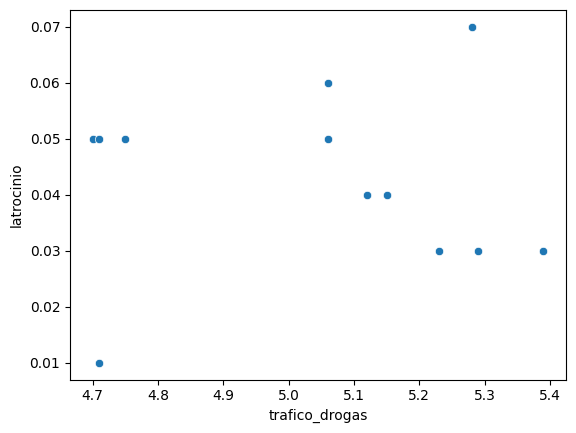

In [ ]:
sns.scatterplot(data=dados_rj, x='trafico_drogas', y='latrocinio');

Não há relação linear entre as variáveis, portanto não é recomendável usar pearson.

In [ ]:
dados_rj[['latrocinio', 'trafico_drogas']].corr(method='spearman')

,latrocinio,trafico_drogas
latrocinio,1.000000,-0.252321
trafico_drogas,-0.252321,1.000000


A correlação entre latrocinio e trafico_drogas é fraca.

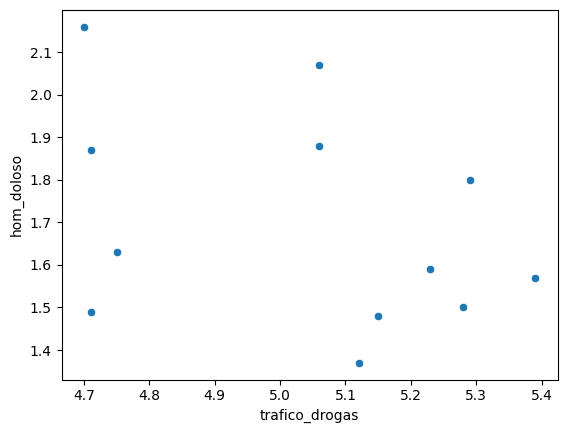

In [ ]:
sns.scatterplot(data=dados_rj, x='trafico_drogas', y='hom_doloso');

In [ ]:
dados_rj[['hom_doloso', 'trafico_drogas']].corr(method='spearman')

,hom_doloso,trafico_drogas
hom_doloso,1.000000,-0.396494
trafico_drogas,-0.396494,1.000000


Há correlação moderada inversamente proporcional entre hom_doloso e trafico_drogas: quanto maior a taxa de tráfico de drogas, menor é a taxa de homicídio.

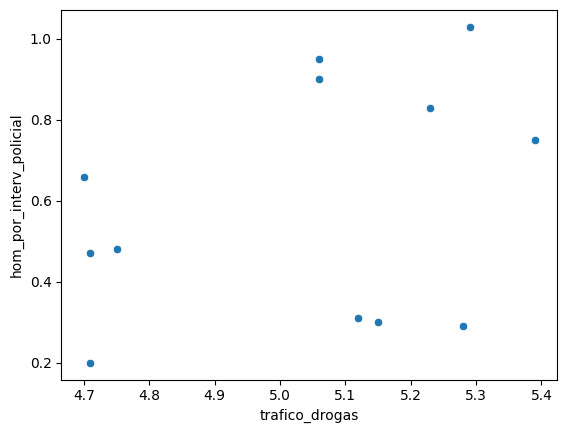

In [ ]:
sns.scatterplot(data=dados_rj, x='trafico_drogas', y='hom_por_interv_policial');

In [ ]:
dados_rj[['hom_por_interv_policial', 'trafico_drogas']].corr(method='spearman')

,hom_por_interv_policial,trafico_drogas
hom_por_interv_policial,1.000000,0.249124
trafico_drogas,0.249124,1.000000


<ipython-input-74-79ed1018c743>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados_rj.corr(), vmin=-1, vmax=1, annot=False);


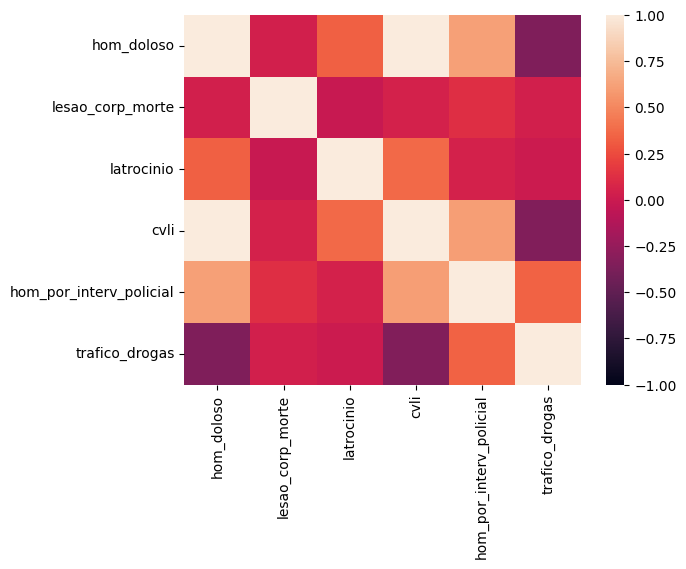

In [ ]:
sns.heatmap(dados_rj.corr(), vmin=-1, vmax=1, annot=False);

Observa-se que, em geral, há correlação positiva muito forte entre a taxa de homicídio doloso e a taxa de crimes violentos letais e intencionais (cvli), porém essa é apenas uma questão de conceito, já que o homicídio doloso é um crime violento letal e intencional. 

Também há uma correlação positiva entre cvli e a taxa de latrocínio, porém é mais fraca. Isto se dá possivelmente porque o fator intencionalidade é menos forte do que no caso anterior.

Há uma correlação positiva moderada também entre cvli e a taxa de hom_por_interv_policial

Há correlação moderada inversamente proporcional entre hom_doloso e trafico_drogas: quanto maior a taxa de tráfico de drogas, menor é a taxa de homicídio. Essa correlação também se dá com relação à taxa de cvli.

Não há correlação (ou ela é muito fraca) entre o restante das variáveis.

In [ ]:
dados_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 204 to 215
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mes                      12 non-null     object 
 1   hom_doloso               12 non-null     float64
 2   lesao_corp_morte         12 non-null     float64
 3   latrocinio               12 non-null     float64
 4   cvli                     12 non-null     float64
 5   hom_por_interv_policial  12 non-null     float64
 6   trafico_drogas           12 non-null     float64
dtypes: float64(6), object(1)
memory usage: 768.0+ bytes


In [ ]:
dados_rj = dados_rj.astype({'mes':'object'})